In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import glob
import os
import time
import xarray as xr

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster

import seaborn as sns
sns.set_style('white')
sns.set_context("poster") #[poster, paper, talk, notebook]

import warnings; warnings.simplefilter('ignore')

In [2]:
# fontsize, linewitch, etc.
fs_titles = 24
fs_labels = 24
fs_axes = 20
fs_text = 20
fs_legend = 20

In [3]:
# fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow_20m.nc' #ARS
fname = '~/Documents/research/sierra/data/20m_analysis/compiled_SUPERsnow_20m.nc' #BSU

#~~~~ ds full
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds.close()
ds

<xarray.Dataset>
Dimensions:  (time: 51, x: 2637, y: 2739)
Coordinates:
  * x        (x) float32 254000.0 254020.0 254040.0 ... 306700.0 306720.0
  * y        (y) float32 4234060.0 4234040.0 4234020.0 ... 4179320.0 4179300.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    dem      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    veg      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
Data variables:
    snow     (time, y, x) int16 dask.array<chunksize=(1, 1000, 1000), meta=np.ndarray>

### group elevation bins in ds.dem

In [5]:
bins=[1500,1750,2000,2250,2500,2750,3000,3250,3500,3750]
elev=ds.groupby_bins(group='dem',bins=bins).groups

In [9]:
snow=ds.snow/10 #snow in cm
snow

<xarray.DataArray 'snow' (time: 51, y: 2739, x: 2637)>
dask.array<truediv, shape=(51, 2739, 2637), dtype=float64, chunksize=(1, 1000, 1000), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float32 254000.0 254020.0 254040.0 ... 306700.0 306720.0
  * y        (y) float32 4234060.0 4234040.0 4234020.0 ... 4179320.0 4179300.0
  * time     (time) datetime64[ns] 2013-04-03 2013-04-29 ... 2018-05-28
    mask     (y, x) uint8 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    dem      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>
    veg      (y, x) float32 dask.array<chunksize=(1000, 1000), meta=np.ndarray>

In [6]:
for layer in list(elev):
    print(layer)
    std = 

(3000.0, 3250.0]
(2750.0, 3000.0]
(2500.0, 2750.0]
(3250.0, 3500.0]
(3500.0, 3750.0]
(2250.0, 2500.0]
(2000.0, 2250.0]
(1750.0, 2000.0]
(1500.0, 1750.0]


In [31]:
snow_el_grp = snow.std(['time'])#.groupby_bins('dem', bins)


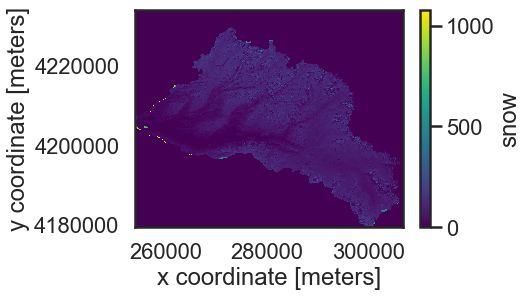

In [32]:
snow_el_grp.plot()

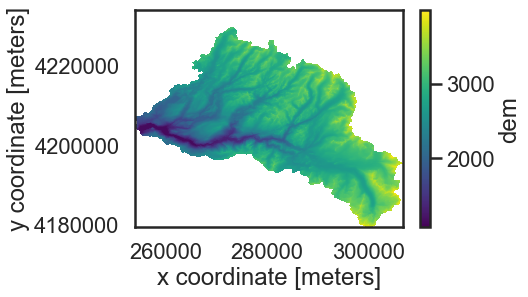

In [15]:
ds.dem.plot()